## Imports

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

## Singular Value Decomposition (SVD)

In [2]:
# Singular Value Decomposition (SVD) Module
class SVD:
    def __init__(self, A):
        self.A = A
    
    # Returns U, S and VT of SVD in Decreasing Order of Singular values (S).
    def apply_svd(self):
        """
            U: Left singular vectors
            S: Singular values (as a 1D array)
            VT: Right singular vectors (transposed)
        """
        U, S, VT = np.linalg.svd(self.A)
        return U, S, VT
    
    # Prints SVD Decomposition matrices U, S and VT.
    def print_svd(self):
        U, S, VT = self.apply_svd()
        print(f"U (Dimensions: {U.shape}):\n", U)
        print(f"S (Dimensions: {S.shape}):\n", S)
        print(f"VT (Dimensions: {VT.shape}):\n", VT)
    
    # Returns the ith left singular vector from the U matrix (1-based indexing).
    def get_left_singular_vector(self, ind=1):
        U, _, _ = self.apply_svd()
        if ind < 1 or ind > U.shape[1]:
            raise IndexError(f"Index {ind} is out of bounds for the left singular vectors. Valid range: 1 to {U.shape[1]}.")
        return U[:, ind - 1]
    
    # Returns the ith right singular vector from the VT matrix (1-based indexing).
    def get_right_singular_vector(self, ind=1):
        _, _, VT = self.apply_svd()
        if ind < 1 or ind > VT.shape[0]:
            raise IndexError(f"Index {ind} is out of bounds for the right singular vectors. Valid range: 1 to {VT.shape[0]}.")
        return VT[ind - 1, :]

### Testing SVD module

In [3]:
A = np.random.randint(1, 101, size=(12, 12))
print(A)

svd = SVD(A)
svd.print_svd()

left_vector = svd.get_left_singular_vector(1)
print(f"left vector: {left_vector}")

right_vector = svd.get_right_singular_vector(1)
print(f"right vector: {right_vector}")

[[ 49  69  80  39  81  61  56  89  81  56  17  15]
 [  8  85  66  41   9  51  72  39  43  89  29  52]
 [ 25   4  59  20 100  38  28  35  75  74  76  59]
 [ 19  67  70  60  91  84  76  28  72  80  23  20]
 [  5  73  70  87   1  36  90  22  59  99  45  60]
 [ 36  49  77   4  27  75  14  26  11   5  70  98]
 [  5  90  36  64  80  21  30  57   1  31   3  94]
 [ 10  94  72  30   2  20  84  78   6  84  46  21]
 [ 14  28  73  66  17  36  94  73  58  24  30  43]
 [ 88   9  30  46  89  49  34  42  80  97  25  67]
 [ 73  29  42  30  40  99  84  89  77  50  96  39]
 [  8  86  21  93  85  83  12  78  35  28  10  97]]
U (Dimensions: (12, 12)):
 [[-0.32426938  0.09177827  0.09639312  0.19973248  0.4802826   0.37555627
  -0.06113795  0.07967994  0.37319829  0.40579536  0.2863779  -0.26359371]
 [-0.28269358 -0.33334911  0.03138285  0.01868911 -0.21585967  0.08271885
  -0.03103414 -0.28348124  0.10136778  0.26471839 -0.70425905 -0.31069912]
 [-0.27178571  0.38789422  0.16569948  0.02412902 -0.38291958 

## Calculating Projection Matrix (P)

In [4]:
# Calculates Projection Matrix by using Least Sqaures Solution and SVD
class ProjectionMatrix:
    def __init__(self, A):
        _, cols = A.shape
        if cols != 12:
            raise ValueError("Expected number of columns is 12, but got {cols}")
        self.A = A
    
    # Returns Projection Vector, which is right singular vector of A corresponding to smallest Eigen value.
    def get_projection_vector(self):
        svd = SVD(self.A)
        _, cols = self.A.shape
        projection_vector = svd.get_right_singular_vector(cols)
        if len(projection_vector) != 12:
            raise ValueError(f"Expected length of 12, but got {len(projection_vector)}")
        return projection_vector
    
    # Returns Projection Matrix of size (3, 4) using Projection vector 
    def get_projection_matrix(self):
        projection_vector = self.get_projection_vector()
        projection_matrix = projection_vector.reshape(3, 4)
        return projection_matrix
    
    # Prints Projection vector
    def print_projection_vector(self):
        projection_vector = self.get_projection_vector()
        print(f"Projection vector (Dimensions: {projection_vector.shape}):\n", projection_vector)

    # Prints Projection matrix
    def print_projection_matrix(self):
        projection_matrix = self.get_projection_matrix()
        print(f"Projection matrix (Dimensions: {projection_matrix.shape}):\n", projection_matrix)

### Testing Projection matrix module

In [5]:
A = np.random.randint(1, 101, size=(12, 12))
print("Data matrix:")
print(A)

proj_matrix = ProjectionMatrix(A)
projection_matrix = proj_matrix.get_projection_matrix()

proj_matrix.print_projection_vector()
proj_matrix.print_projection_matrix()

Data matrix:
[[ 68  14  98  65  79  84  95  72  50  78   5  30]
 [ 75   3  92  12  77  92  66  31  27  79  28  53]
 [ 78  18  94  33   6  62  97  35  58  91  91  42]
 [ 91  22   9  77  15  89  40  83  15  61  44  98]
 [100  32  41 100  64  62  63  38   8  33  28  85]
 [  4  76  81  47  70  21  92  61  92  40  63  62]
 [ 78  81  98  73  42  60  44   3  73  73  80  75]
 [ 31  93  28  18  87  65  91  42  95   7  33  93]
 [ 74  72  61  59  35   7  60   5   7  88  60  36]
 [ 74  63  57   7   4  68  66  18  74  83  91  51]
 [ 46  35  55  95  17  91  54   3  95  23  15  28]
 [ 44  42   1  29  16  38   3  94  34  73  83  67]]
Projection vector (Dimensions: (12,)):
 [-0.18417149  0.35492903  0.17878974  0.01417282 -0.03244801  0.46485332
  0.02316928  0.14939019 -0.48136711 -0.35777501  0.31224675 -0.33275906]
Projection matrix (Dimensions: (3, 4)):
 [[-0.18417149  0.35492903  0.17878974  0.01417282]
 [-0.03244801  0.46485332  0.02316928  0.14939019]
 [-0.48136711 -0.35777501  0.31224675 -0.332

## Decomposition of Projection Matrix into Intrinsic (I) and Extrinsic Matrices (E)

In [6]:
# This module Decomposes Projection Matrix into Intrinsic (I) and Extrinsic Matrices (E).
# Extrinsic Matrix is further decomposed into Rotation Matrix and Translation Vector.
class IEMatrices:
    def __init__(self, P):
        if P.shape != (3, 4):
            raise ValueError(f"Expected shape of P is (3, 4), but got {P.shape}")
        self.P = P

    # Decompose M ((3, 3): first 3 columns of P) into K (I: Intrinsic Matrix) and R (Rotation matrix: part of E (Extrinsic Matrix)).
    def get_KR(self):
        M = self.P[:, :3]
        K, R = sp.linalg.rq(M)
        return K, R
    
    # Returns t (translation vector) using K and last column of P
    def get_t(self):
        K, _ = self.get_KR()
        if np.linalg.det(K) == 0:
            raise ValueError(f"K is singular Matrix, Inverse does not exist.")
        
        K_inv = np.linalg.inv(K)
        p4 = self.P[:, 3]
        t = K_inv @ p4
        return t
    
    # Return K (Intrinsic matrix), R (Rotation matrix) and t (Translation vector)
    def get_KRt(self):
        K, R = self.get_KR()
        t = self.get_t()
        return K, R, t
    
    def print_KRt(self):
        K, R = self.get_KR()
        t = self.get_t()
        print(f"Intrinsic matrix - K (Dimensions: {K.shape}):\n", K)
        print(f"Rotation matrix - R (Dimensions: {R.shape}):\n", R)
        print(f"Translation vector - t (Dimensions: {t.shape}):\n", t)


### Testing IEMatrices module

In [7]:
ieMats = IEMatrices(projection_matrix)
K, R, t = ieMats.get_KRt()
ieMats.print_KRt()

Intrinsic matrix - K (Dimensions: (3, 3)):
 [[ 0.04790898 -0.43462024 -0.0258747 ]
 [ 0.         -0.41553056  0.21216187]
 [ 0.          0.         -0.67617696]]
Rotation matrix - R (Dimensions: (3, 3)):
 [[ 0.54609791 -0.00363432  0.83771347]
 [ 0.44156805 -0.84854268 -0.29153555]
 [ 0.71189517  0.52911446 -0.46178259]]
Translation vector - t (Dimensions: (3,)):
 [-0.42041549 -0.10825064  0.49211831]


## Camera Calibration

In [8]:
class CameraCalibration:
    def __init__(self, data):
        """data contains pairs of matching points: 
        1. (x, y, z): 3D point in world co-ordinate frame with origin at one of the corners of Rubics cube/Chessboard 
        2. (u, v): 2D point in captured image with origin at left top corner
        Note: data should have atleast 6 pairs of matching points to calculate Projection matrix.
        """
        total_pairs = len(data)
        if total_pairs < 6:
            raise ValueError(f"Expected at least 6 pairs of matching points, but got {total_pairs}")
        self.data = data

    def get_data_matrix(self):
        data_matrix = []
        for (x_w, y_w, z_w), (u, v) in self.data:
            # First row for each pair
            row1 = [
                x_w, y_w, z_w, 1, 
                0, 0, 0, 0, 
                -u * x_w, -u * y_w, -u * z_w, -u
            ]
            # Second row for each pair
            row2 = [
                0, 0, 0, 0,
                x_w, y_w, z_w, 1, 
                -v * x_w, -v * y_w, -v * z_w, -v
            ]
            data_matrix.append(row1)
            data_matrix.append(row2)
        return np.array(data_matrix)
    
    def print_data_matrix(self):
        data_matrix = self.get_data_matrix()
        print(f"Data matrix - A (Dimensions: {data_matrix.shape}):\n", data_matrix)
    
    def get_camera_projection_matrix(self):
        data_matrix = self.get_data_matrix()
        proj_mat_obj = ProjectionMatrix(data_matrix)
        projection_matrix = proj_mat_obj.get_projection_matrix()
        return projection_matrix
    
    def print_camera_projection_matrix(self):
        data_matrix = self.get_data_matrix()
        proj_mat_obj = ProjectionMatrix(data_matrix)
        proj_mat_obj.print_projection_matrix()
    
    def get_camera_KRt(self):
        projection_matrix = self.get_camera_projection_matrix()
        ieMats_obj = IEMatrices(projection_matrix)
        K, R, t = ieMats_obj.get_KRt()
        return K, R, t
    
    def print_camera_KRt(self):
        projection_matrix = self.get_camera_projection_matrix()
        ieMats_obj = IEMatrices(projection_matrix)
        ieMats_obj.print_KRt()

### Testing Camera calibration module

In [9]:
data = [
    ((3, 1, 2), (0.5, 0.3)),
    ((4, 5, 6), (0.7, 0.9)),
    ((7, 2, 9), (0.2, 0.4)),
    ((2, 3, 7), (0.1, 0.3)),
    ((6, 7, 4), (0.4, 0.5)),
    ((3, 4, 1), (0.3, 0.1)),
]

camera_cal = CameraCalibration(data)
camera_cal.print_data_matrix()
camera_cal.print_camera_projection_matrix()
camera_cal.print_camera_KRt()

Data matrix - A (Dimensions: (12, 12)):
 [[ 3.   1.   2.   1.   0.   0.   0.   0.  -1.5 -0.5 -1.  -0.5]
 [ 0.   0.   0.   0.   3.   1.   2.   1.  -0.9 -0.3 -0.6 -0.3]
 [ 4.   5.   6.   1.   0.   0.   0.   0.  -2.8 -3.5 -4.2 -0.7]
 [ 0.   0.   0.   0.   4.   5.   6.   1.  -3.6 -4.5 -5.4 -0.9]
 [ 7.   2.   9.   1.   0.   0.   0.   0.  -1.4 -0.4 -1.8 -0.2]
 [ 0.   0.   0.   0.   7.   2.   9.   1.  -2.8 -0.8 -3.6 -0.4]
 [ 2.   3.   7.   1.   0.   0.   0.   0.  -0.2 -0.3 -0.7 -0.1]
 [ 0.   0.   0.   0.   2.   3.   7.   1.  -0.6 -0.9 -2.1 -0.3]
 [ 6.   7.   4.   1.   0.   0.   0.   0.  -2.4 -2.8 -1.6 -0.4]
 [ 0.   0.   0.   0.   6.   7.   4.   1.  -3.  -3.5 -2.  -0.5]
 [ 3.   4.   1.   1.   0.   0.   0.   0.  -0.9 -1.2 -0.3 -0.3]
 [ 0.   0.   0.   0.   3.   4.   1.   1.  -0.3 -0.4 -0.1 -0.1]]
Projection matrix (Dimensions: (3, 4)):
 [[ 0.02841523  0.03866464  0.01493403 -0.3122534 ]
 [ 0.05925896  0.02608833  0.00413444 -0.30711713]
 [ 0.15911663  0.04804651  0.01808915 -0.87948188]]
Intrins

## Data Generation using Rubik's Cube

Camera : Vivo V40 Pro

In [10]:
def open_and_display_image(img_path):
    img = Image.open(img_path)
    width, height = img.size
    print("width:",width, ",height:", height)
    plt.imshow(img)

def plot_points_on_image(image_path, points):
    img = Image.open(image_path)
    plt.imshow(img)
    for index, (u, v) in enumerate(points, start=1):
        plt.scatter(u, v, color='red', s=5)
        plt.text(u, v, str(index), color='white', fontsize=12, ha='right', va='bottom')
    plt.show()

def get_data(world_frame_points, image_points):
    if len(world_frame_points) != len(image_points):
        raise ValueError("Lists are of different sizes.")
    
    data = list(zip(world_frame_points, image_points))
    return data

def project_point(world_frame_point, projection_matrix):
    homogeneous_point = np.array([*world_frame_point, 1])
    projection_matrix = np.array(projection_matrix)
    projected_point = projection_matrix @ homogeneous_point
    u = projected_point[0] / projected_point[2]
    v = projected_point[1] / projected_point[2]
    return (u, v)

### View1

width: 582 ,height: 1280


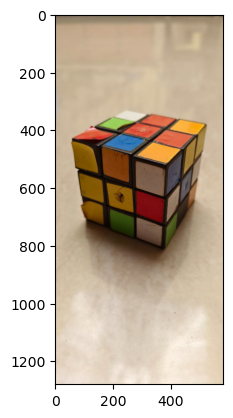

In [11]:
img_path1 = r"C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Camera_Calibration\rubics_view1.jpg"
open_and_display_image(img_path1)

### Matching pairs of world_frame points (x, y, z) and image points (u, v)

In [12]:
cube_side = 4.8 # cube side is in cm

world_frame_points1 = [
    (0, 0, 0), # origin of world frame
    (cube_side, 0, 0), # point on x-axis of world frame
    (0, cube_side, 0), # point on y-axis of world frame
    (0, 0, cube_side), # point on z-axis of world frame
    (cube_side, 0, cube_side), # right corner
    (0, cube_side, cube_side) # left corner
]

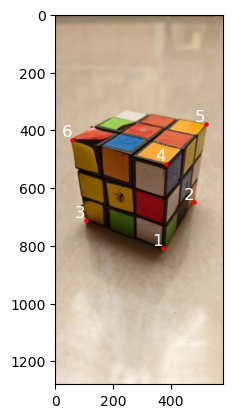

In [13]:
image_points1 = [
    (373, 807), # corresponding point to origin of world frame
    (480, 648), # corresponding point to point on x-axis of world frame
    (105, 710), # corresponding point to point on y-axis of world frame
    (384, 515), # corresponding point to point on z-axis of world frame
    (520, 378), # corresponding point to right corner
    (58, 432) # corresponding point to left corner
]

plot_points_on_image(img_path1, image_points1)

### Calibrating Camera

In [14]:
data1 = get_data(world_frame_points1, image_points1)
print(data1)

camera_cal1 = CameraCalibration(data1)
# camera_cal1.print_data_matrix()
camera_cal1.print_camera_projection_matrix()
projection_matrix1 = camera_cal1.get_camera_projection_matrix()
camera_cal1.print_camera_KRt()

[((0, 0, 0), (373, 807)), ((4.8, 0, 0), (480, 648)), ((0, 4.8, 0), (105, 710)), ((0, 0, 4.8), (384, 515)), ((4.8, 0, 4.8), (520, 378)), ((0, 4.8, 4.8), (58, 432))]
Projection matrix (Dimensions: (3, 4)):
 [[-4.66119275e-02  5.89859205e-02  1.53230868e-02 -4.14476746e-01]
 [ 8.86274544e-03  3.84861837e-03  9.33120319e-02 -9.01953696e-01]
 [-4.33352815e-05 -2.63890231e-05  4.92642035e-05 -1.11783109e-03]]
Intrinsic matrix - K (Dimensions: (3, 3)):
 [[-7.46942699e-02 -3.29066219e-03 -1.72262931e-02]
 [ 0.00000000e+00 -7.36260093e-02 -5.81352405e-02]
 [ 0.00000000e+00  0.00000000e+00 -7.07197915e-05]]
Rotation matrix - R (Dimensions: (3, 3)):
 [[ 0.50933478 -0.86047197 -0.01288661]
 [-0.6042231  -0.34691176 -0.71733303]
 [ 0.61277445  0.37314905 -0.69661127]]
Translation vector - t (Dimensions: (3,)):
 [ 1.91377026 -0.23035224 15.80648166]


### Validating Camera Projection matrix

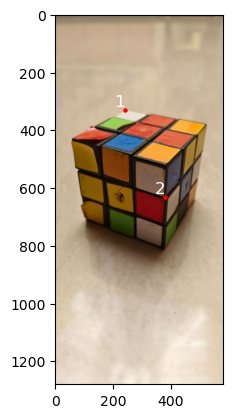

In [15]:
validation_world_frame_points1 = [
    (cube_side, cube_side, cube_side), # back corner
    (0, 0, 2*cube_side/3)
]
validation_image_points1 = [
    (240, 328), # corresponding point to back corner
    (380, 630)
]

plot_points_on_image(img_path1, validation_image_points1)

In [16]:
ind = 0
projected_point1 = project_point(validation_world_frame_points1[ind], projection_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", validation_image_points1[ind])

ind = 1
projected_point1 = project_point(validation_world_frame_points1[ind], projection_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", validation_image_points1[ind])

Projected point: (231.51447534385767, 323.21431405960914)
Actual point: (240, 328)
Projected point: (380.59605847615563, 628.3734842663638)
Actual point: (380, 630)


In [17]:
ind = 0
projected_point1 = project_point(world_frame_points1[ind], projection_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", image_points1[ind])

ind = 1
projected_point1 = project_point(world_frame_points1[ind], projection_matrix1)
print("Projected point:", projected_point1)
print("Actual point:", image_points1[ind])

Projected point: (370.78656245925436, 806.8783433861257)
Actual point: (373, 807)
Projected point: (481.36561532167497, 648.2020707900718)
Actual point: (480, 648)


### View2

width: 1280 ,height: 582


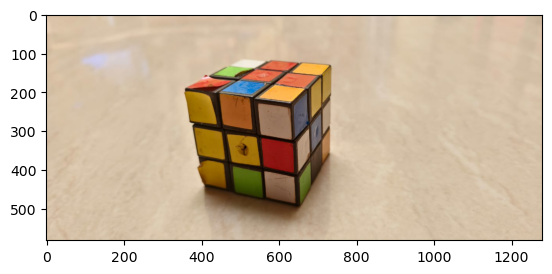

In [18]:
img_path2 = r"C:\Users\suyash\OneDrive - iiit-b\Sem7\3D Vision\Assignments\3D_Vision_Camera_Calibration_and_Homography_Estimation\Camera_Calibration\rubics_view2.jpg"
open_and_display_image(img_path2)

In [19]:
cube_side = 4.8 # cube side is in cm

world_frame_points2 = [
    (0, 0, 0), # origin of world frame
    (cube_side, 0, 0), # point on x-axis of world frame
    (0, cube_side, 0), # point on y-axis of world frame
    (0, 0, cube_side), # point on z-axis of world frame
    (cube_side, 0, cube_side), # right corner
    (0, cube_side, cube_side) # left corner
]

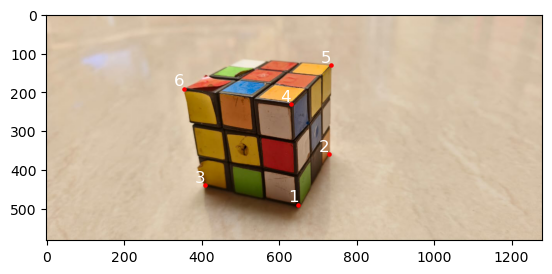

In [47]:
image_points2 = [
    (650, 490), # corresponding point to origin of world frame
    (730, 360), # corresponding point to point on x-axis of world frame
    (410, 440), # corresponding point to point on y-axis of world frame
    (630, 230), # corresponding point to point on z-axis of world frame
    (735, 130), # corresponding point to right corner
    (355, 190) # corresponding point to left corner
]

plot_points_on_image(img_path2, image_points2)

### Calibrating Camera

In [48]:
data2 = get_data(world_frame_points2, image_points2)
print(data2)

camera_cal2 = CameraCalibration(data2)
# camera_cal2.print_data_matrix()
camera_cal2.print_camera_projection_matrix()
projection_matrix2 = camera_cal2.get_camera_projection_matrix()
camera_cal2.print_camera_KRt()

[((0, 0, 0), (650, 490)), ((4.8, 0, 0), (730, 360)), ((0, 4.8, 0), (410, 440)), ((0, 0, 4.8), (630, 230)), ((4.8, 0, 4.8), (735, 130)), ((0, 4.8, 4.8), (355, 190))]
Projection matrix (Dimensions: (3, 4)):
 [[ 5.92121520e-02 -5.31732538e-02 -3.02268770e-02  7.92014715e-01]
 [-1.45540223e-02 -5.12640615e-03 -7.59677157e-02  5.99545543e-01]
 [ 5.16637694e-05  1.74748486e-05 -4.19382846e-05  1.22323231e-03]]
Intrinsic matrix - K (Dimensions: (3, 3)):
 [[6.93413495e-02 3.47944981e-04 4.93841486e-02]
 [0.00000000e+00 6.96273375e-02 3.40767853e-02]
 [0.00000000e+00 0.00000000e+00 6.87992378e-05]]
Rotation matrix - R (Dimensions: (3, 3)):
 [[ 0.32200791 -0.94673443  0.00219613]
 [-0.57654768 -0.19793707 -0.79272548]
 [ 0.7509352   0.25399771 -0.60957484]]
Translation vector - t (Dimensions: (3,)):
 [-1.24010846 -0.09092288 17.77973644]


### Validating Camera Projection matrix

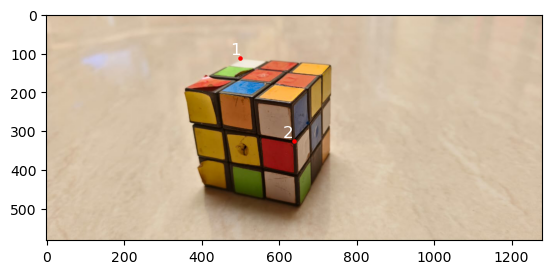

In [64]:
validation_world_frame_points2 = [
    (cube_side, cube_side, cube_side), # back corner
    (0, 0, 2*cube_side/3)
]
validation_image_points2 = [
    (500, 110), # corresponding point to back corner
    (638, 325)
]

plot_points_on_image(img_path2, validation_image_points2)

In [65]:
ind = 0
projected_point2 = project_point(validation_world_frame_points2[ind], projection_matrix2)
print("Projected point:", projected_point2)
print("Actual point:", validation_image_points2[ind])

ind = 1
projected_point2 = project_point(validation_world_frame_points2[ind], projection_matrix2)
print("Projected point:", projected_point2)
print("Actual point:", validation_image_points2[ind])

Projected point: (499.2727548853863, 103.73399498994776)
Actual point: (500, 110)
Projected point: (638.4478245672515, 327.3086297165764)
Actual point: (638, 325)


In [66]:
ind = 0
projected_point2 = project_point(world_frame_points2[ind], projection_matrix2)
print("Projected point:", projected_point2)
print("Actual point:", image_points2[ind])

ind = 1
projected_point2 = project_point(world_frame_points2[ind], projection_matrix2)
print("Projected point:", projected_point2)
print("Actual point:", image_points2[ind])

Projected point: (647.4769396750339, 490.13219797791817)
Actual point: (650, 490)
Projected point: (731.524999513992, 360.03236028855054)
Actual point: (730, 360)
